# Joining 30 year mortgage rate

https://youtu.be/FvamL5oA_EE?list=PLQVvvaa0QuDc-3szzjeP6N6b0aDrrKyL-

In [1]:
import quandl;
import pandas as pd;

import pickle;

import matplotlib.pyplot as plt;
from matplotlib import style;
style.use("ggplot");

In [9]:
api_key = open("quandlapikey.txt", "r").read();

def mortgage_30y():
    df = quandl.get("FMAC/MORTG", trim_start = "1975-01-01", authtoken = api_key);       
    df["Value"] = (df["Value"] - df["Value"][0]) / df["Value"][0] * 100.0;
    df.columns = ["M30"];
    return df;

def state_list():
    fiddy_states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states");
    return fiddy_states[0][0][1:];

def grap_initial_state_data_start_pct():
    states = state_list();
    main_df = pd.DataFrame();
    for ab in states:
        querry = "FMAC/HPI_" + ab;
        df = quandl.get(querry, authtoken = api_key);
        df.columns = [ab];        
        df[ab] = (df[ab] - df[ab][0]) / df[ab][0] * 100.0; # <-------
        if main_df.empty:
            main_df = df;
        else:
            main_df = main_df.join(df);

    pickle_out = open("./data/fiddy_states.pickle", "wb");
    pickle.dump(main_df, pickle_out);
    pickle_out.close();
    
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken = api_key);
    df.columns = ["US"];        
    df["US"] = (df["US"] - df["US"][0]) / df["US"][0] * 100.0; # <-------
    return df;

In [10]:
df = mortgage_30y();
print(df.head()); # begin of month

                 M30
Date                
1975-01-01  0.000000
1975-02-01 -3.393425
1975-03-01 -5.620361
1975-04-01 -6.468717
1975-05-01 -5.514316


In [11]:
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");
print(HPI_data.head()); # end of month

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1975-02-28  0.626500  1.485775  1.688504  0.846192  0.356177  1.159639   
1975-03-31  1.358575  3.006473  3.261346  1.581956  1.575690  2.299449   
1975-04-30  2.254726  4.593530  4.475810  2.183669  3.573196  3.359028   
1975-05-31  3.107829  6.327600  5.139617  2.786248  5.241395  4.226895   

                  CT        DE         FL        GA    ...           SD  \
Date                                                   ...                
1975-01-31  0.000000  0.000000   0.000000  0.000000    ...     0.000000   
1975-02-28  2.123926  0.142451   3.938796 -0.902841    ...    -1.099859   
1975-03-31  3.719898  0.387918   9.798243 -1.282758    ...    -2.218400   
1975-04-30  4.616778  0.891619  16.974819 -1.068371    ...    -3.328868   
1975-05-31  4.901787  1.752086 

In [12]:
def mortgage_30y_resampled():
    df = quandl.get("FMAC/MORTG", trim_start = "1975-01-01", authtoken = api_key);       
    df["Value"] = (df["Value"] - df["Value"][0]) / df["Value"][0] * 100.0;
    df.columns = ["M30"];
    return df.resample("M").mean();

m30 = mortgage_30y_resampled();
print(m30.head()); # begin of month

                 M30
Date                
1975-01-31  0.000000
1975-02-28 -3.393425
1975-03-31 -5.620361
1975-04-30 -6.468717
1975-05-31 -5.514316


In [14]:
HPI_bench = HPI_Benchmark();
state_HPI_M30 = HPI_data.join(m30);
print(state_HPI_M30.head());

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1975-02-28  0.626500  1.485775  1.688504  0.846192  0.356177  1.159639   
1975-03-31  1.358575  3.006473  3.261346  1.581956  1.575690  2.299449   
1975-04-30  2.254726  4.593530  4.475810  2.183669  3.573196  3.359028   
1975-05-31  3.107829  6.327600  5.139617  2.786248  5.241395  4.226895   

                  CT        DE         FL        GA    ...           TN  \
Date                                                   ...                
1975-01-31  0.000000  0.000000   0.000000  0.000000    ...     0.000000   
1975-02-28  2.123926  0.142451   3.938796 -0.902841    ...     0.112132   
1975-03-31  3.719898  0.387918   9.798243 -1.282758    ...     0.369186   
1975-04-30  4.616778  0.891619  16.974819 -1.068371    ...     0.765570   
1975-05-31  4.901787  1.752086 

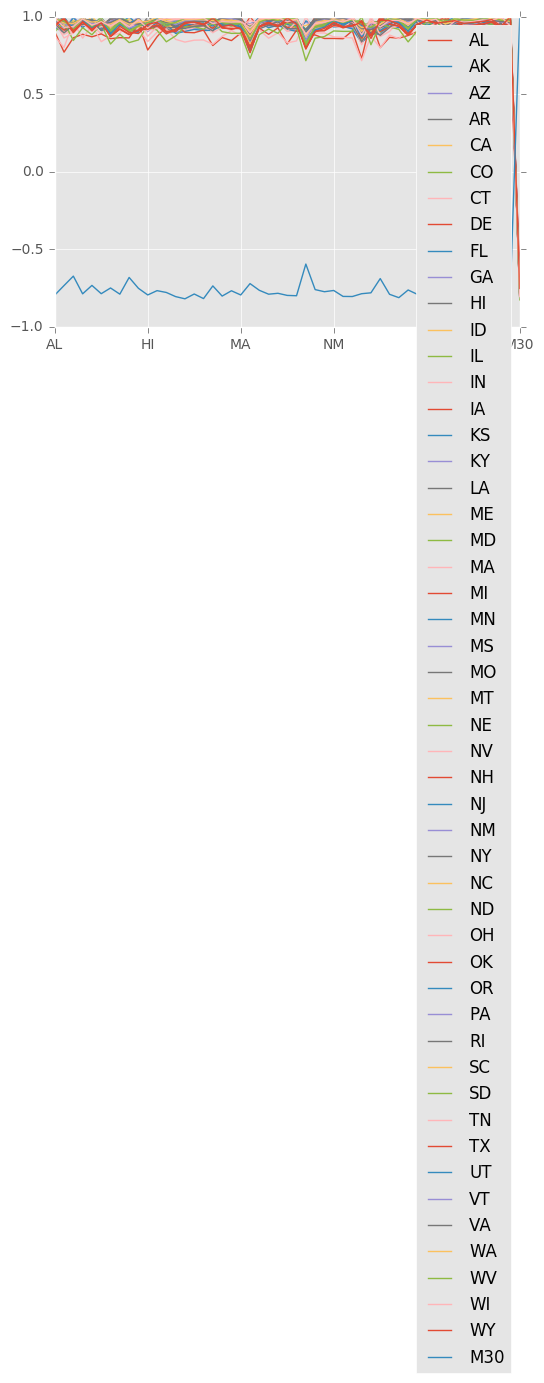

In [15]:
state_HPI_M30.corr().plot();
plt.show();

In [16]:
print(state_HPI_M30.corr()["M30"].describe());
# M30 correlates with HPI

count    51.000000
mean     -0.738489
std       0.251952
min      -0.827213
25%      -0.799379
50%      -0.787303
75%      -0.757018
max       1.000000
Name: M30, dtype: float64
